In [33]:
import pandas as pd
from pathlib import Path
from utilities import xml_2_csv
import cv2
from bounding_box import bounding_box as bb
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
data_dir = Path('../../Datasets/VOCdevkit/VOC2007/')
annot_dir = data_dir/'Annotations'
im_dir = data_dir/'JPEGImages'

In [15]:
annot_list = list(annot_dir.iterdir())
annot_list = [str(ann) for ann in annot_list]

In [16]:
df = xml_2_csv(annot_list)

In [17]:
df['filename'] = [str(im_dir/f'{ann}') for ann in df.filename]
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,../../Datasets/VOCdevkit/VOC2007/JPEGImages/007826.jpg,500,375,diningtable,80,217,320,273
1,../../Datasets/VOCdevkit/VOC2007/JPEGImages/007826.jpg,500,375,chair,197,193,257,326
2,../../Datasets/VOCdevkit/VOC2007/JPEGImages/007826.jpg,500,375,chair,139,184,185,231
3,../../Datasets/VOCdevkit/VOC2007/JPEGImages/007826.jpg,500,375,chair,258,180,312,314
4,../../Datasets/VOCdevkit/VOC2007/JPEGImages/007826.jpg,500,375,chair,10,195,93,358


In [9]:
# all unique images
images = df.filename.unique()

In [35]:
def display_random_image():
    idx = np.random.randint(0, len(images))
    im = cv2.cvtColor(cv2.imread(images[idx]), cv2.COLOR_BGR2RGB)
    records = df[df['filename'] == images[idx]]
    boxes   = records[['xmin', 'ymin', 'xmax', 'ymax']].values
    labels  = records[['class']].values

    for i in range(len(boxes)):
        bb.add(im, boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3], labels[i].item())


    plt.figure(figsize=(15,15))
    plt.imshow(im)

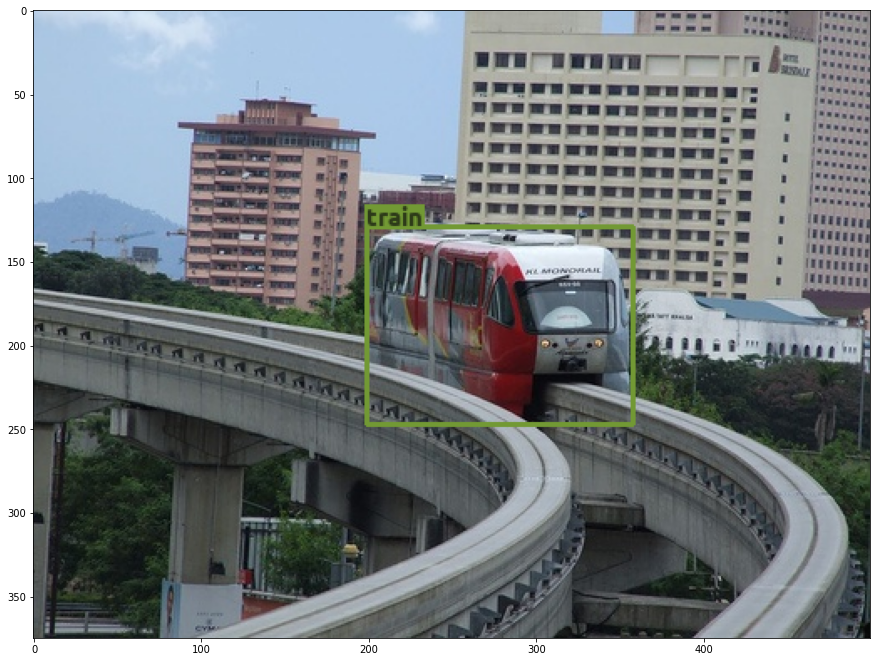

In [36]:
display_random_image()

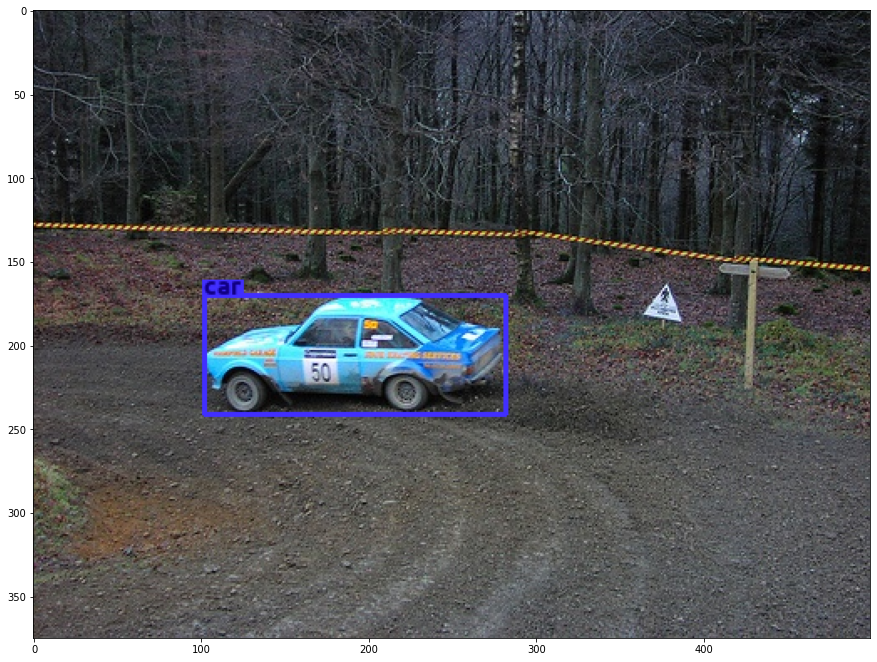

In [37]:
display_random_image()

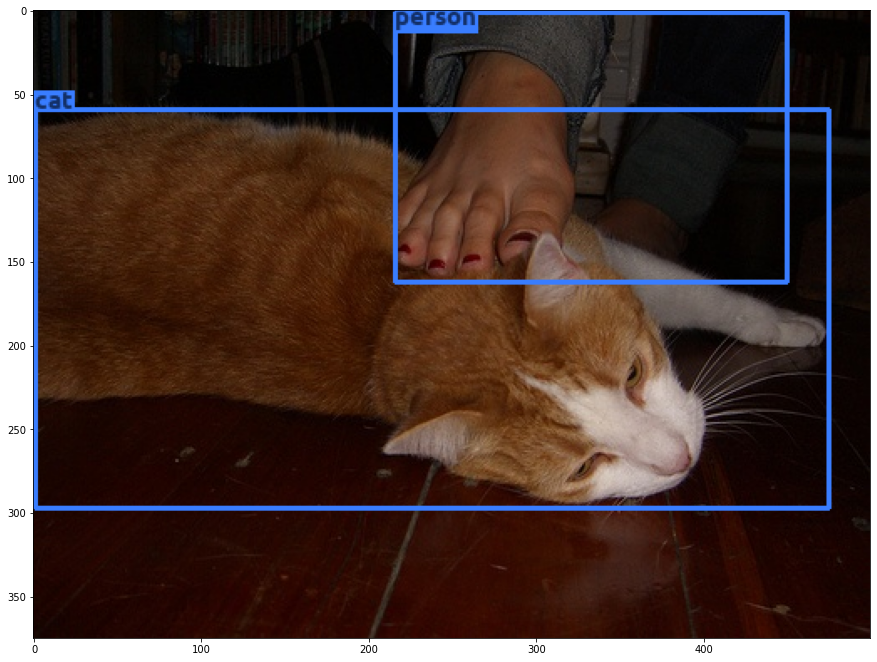

In [38]:
display_random_image()

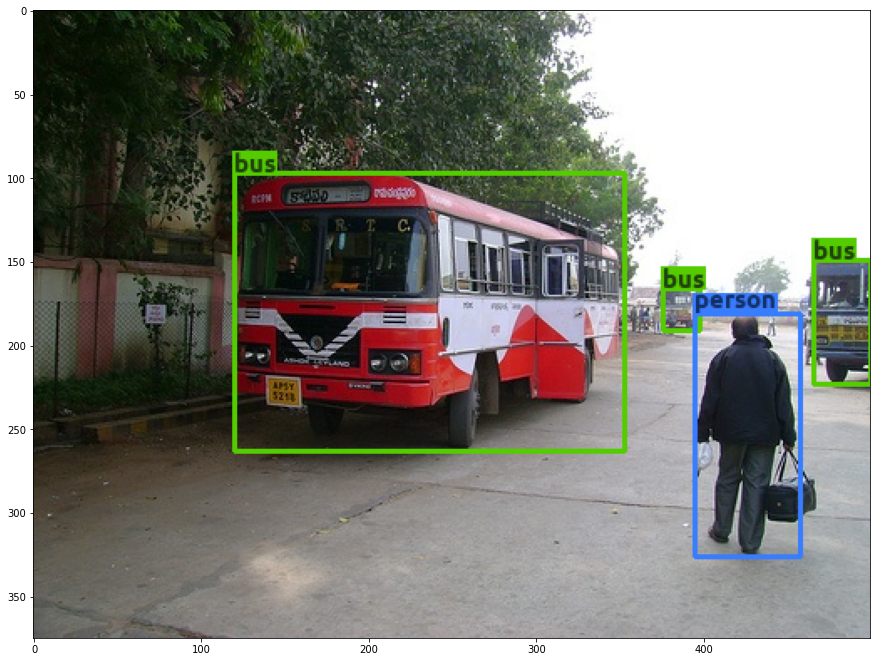

In [39]:
display_random_image()